***EDA***

***Exploración y limpieza de datos***

In [19]:
import pandas as pd

url = '/workspaces/JLL_machine-learning-python-template/data/raw/bank-marketing-campaign-data.csv'

data = pd.read_csv(url, sep=";") 


*Eliminar información irrelevante*

In [20]:
data.drop(["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"], axis=1, inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  campaign     41188 non-null  int64 
 12  pdays        41188 non-null  int64 
 13  previous     41188 non-null  int64 
 14  poutcome     41188 non-null  object
 15  y            41188 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.0+ MB


Existen un total de 41188 filas (en este caso, personas) y 16 columnas (una vez hecha la limpieza), de entre las que encontramos la target o clase a predecir, y (depósito contratado o no).
No encontramos valores nulos por lo que facilita la limpieza y lectura de los datos.
Los datos cuentan con 5 características numéricas y 11 características categóricas.

***Análisis de las variables univariantes***

*Categóricas*

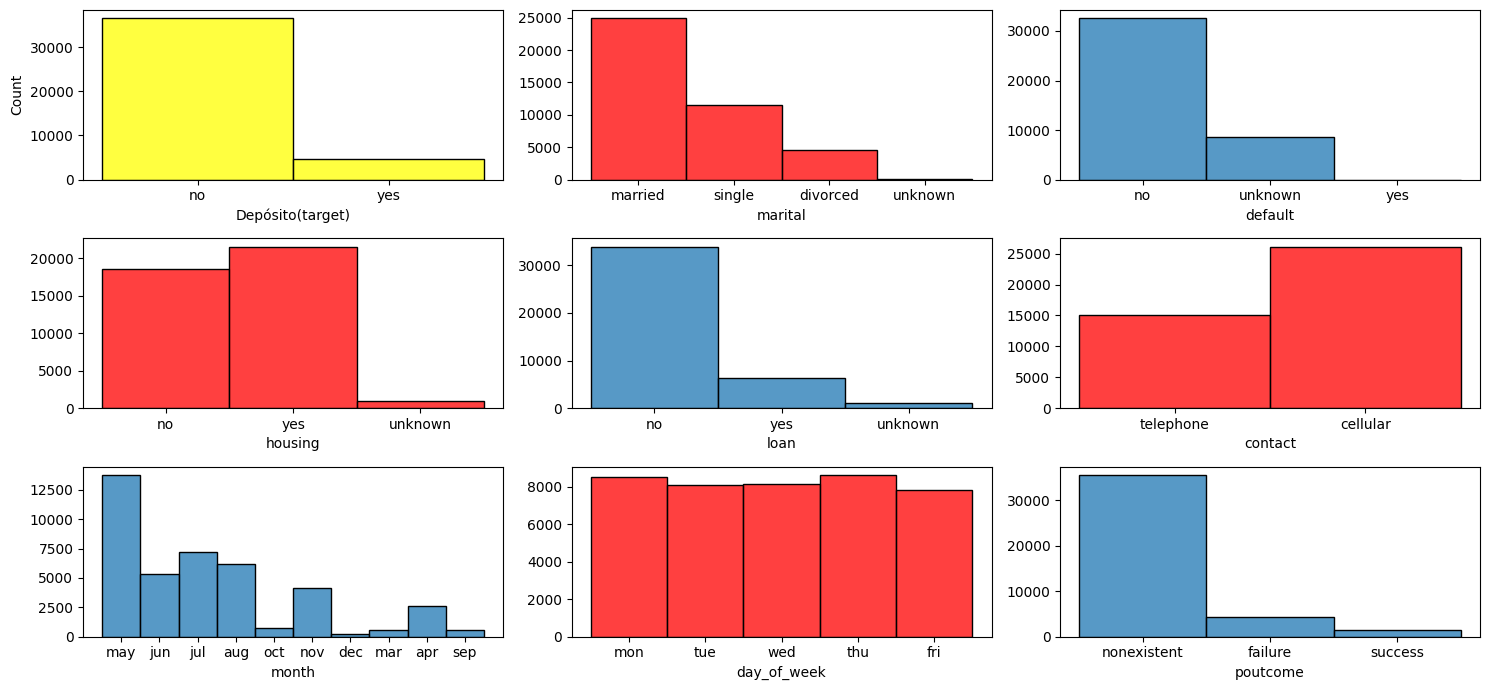

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize = (15, 7))

sns.histplot(ax = axis[0, 0], data = data, x = "y", color="yellow").set(xlabel = 'Depósito(target)')
sns.histplot(ax = axis[0, 1], data = data, x = "marital", color="red").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = data, x = "default").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = data, x = "housing", color="red").set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = data, x = "loan").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = data, x = "contact", color="red").set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = data, x = "month").set(ylabel = None)
sns.histplot(ax = axis[2, 1], data = data, x = "day_of_week", color="red").set(ylabel = None)
sns.histplot(ax = axis[2, 2], data = data, x = "poutcome").set(ylabel = None)

plt.tight_layout()
plt.show()

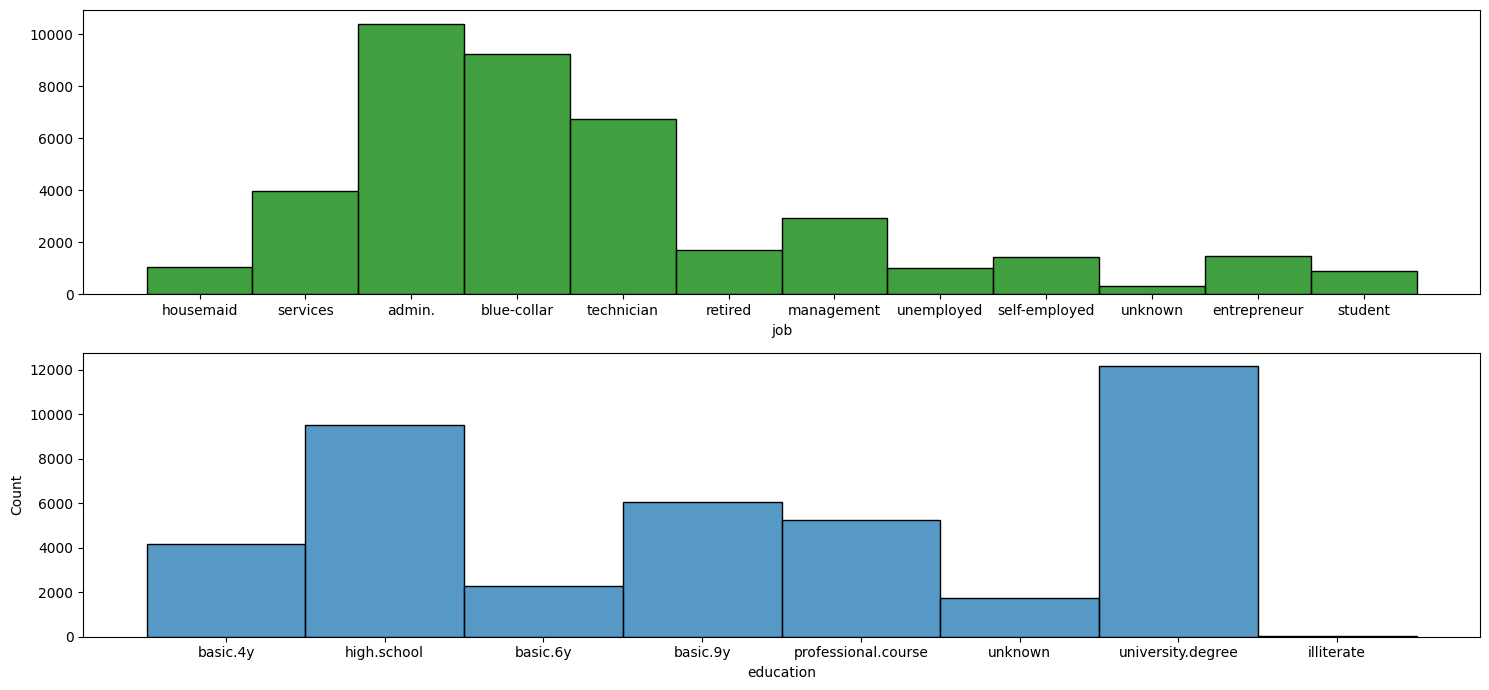

In [23]:
fig, axis = plt.subplots(2,1, figsize = (15, 7))

sns.histplot(ax = axis[0], data = data, x = "job", color="green").set(ylabel = None)
sns.histplot(ax = axis[1], data = data, x = "education")

plt.tight_layout()
plt.show()

Vemos como los datos están bantaste repartidos en todas las variables. Destacamos que nuestra target nos muestra una clara tendencia en el no frente al sí, por lo que la estadística de contratos de depósitos es baja. Por otro lado, destacamos variables como los créditos personales que también están muy bajos y cómo la gran mayoría de los clientes se encuentran sin crédito actualmente. Como detalle interesante en las campañas de marketing, vemos que mayo es un buen mes que destaca sobre el resto y que son mayoría los clientes que esta´n casados en esta compañia.

*Numéricas*

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  campaign     41188 non-null  int64 
 12  pdays        41188 non-null  int64 
 13  previous     41188 non-null  int64 
 14  poutcome     41188 non-null  object
 15  y            41188 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.0+ MB


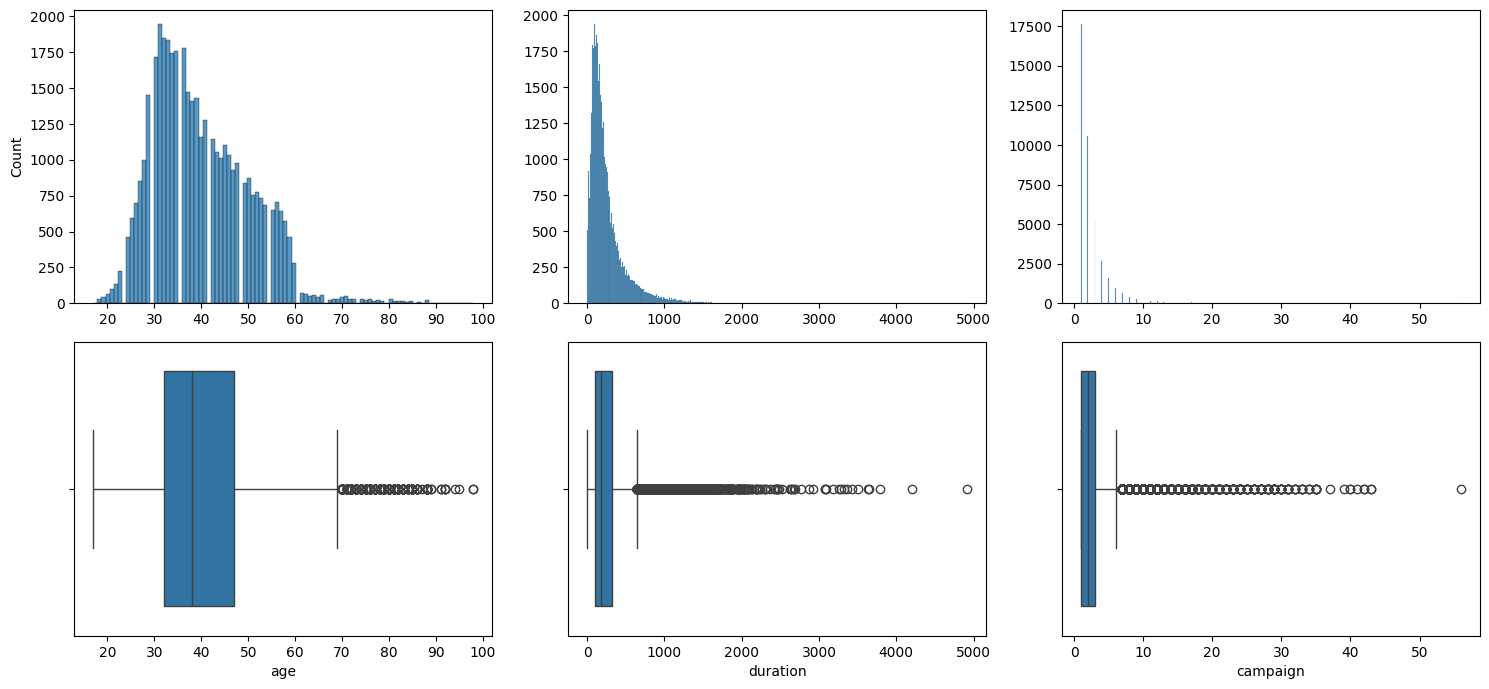

In [25]:
fig, axis = plt.subplots(2,3, figsize = (15, 7))

sns.histplot(ax = axis[0, 0], data = data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "age")
sns.histplot(ax = axis[0, 1], data = data, x = "duration").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "duration")
sns.histplot(ax = axis[0, 2], data = data, x = "campaign").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = data, x = "campaign")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

De la visualización resultante podemos sacar en claro que ambas variables cuentan con valores atípicos y que se alejan de la distribución conida y que no sus distribuciones son ligera falta de simetría pero cercanas a una normal; las tres están totalmente sesgadas hacia la izquierda, donde la media es inferior a la moda.

***Análisis de variables multivariante***

*Categórico-Categórico*

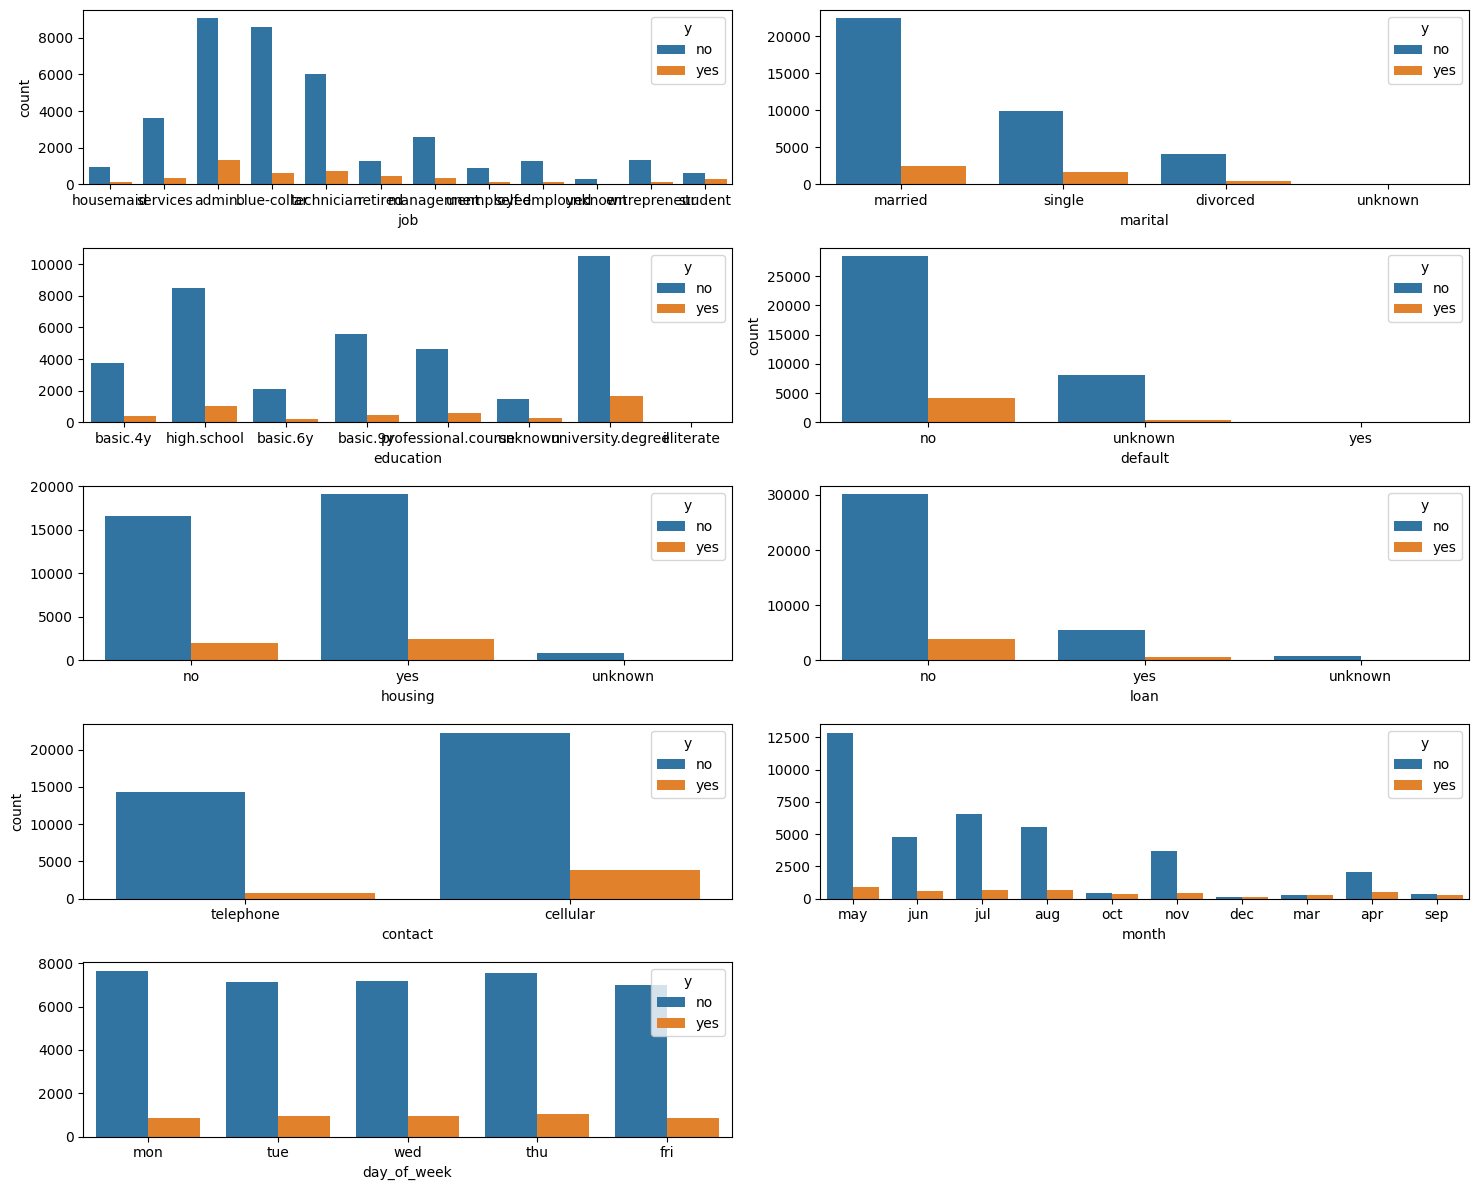

In [26]:
fig, axis = plt.subplots(5, 2, figsize = (15, 12))

sns.countplot(ax = axis[0, 0], data = data, x = "job", hue = "y")
sns.countplot(ax = axis[0, 1], data = data, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = data, x = "education", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 1], data = data, x = "default", hue = "y")
sns.countplot(ax = axis[2, 0], data = data, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 1], data = data, x = "loan", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[3, 0], data = data, x = "contact", hue = "y")
sns.countplot(ax = axis[3, 1], data = data, x = "month", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[4, 0], data = data, x = "day_of_week", hue = "y").set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[4,1])
plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  campaign     41188 non-null  int64 
 12  pdays        41188 non-null  int64 
 13  previous     41188 non-null  int64 
 14  poutcome     41188 non-null  object
 15  y            41188 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.0+ MB


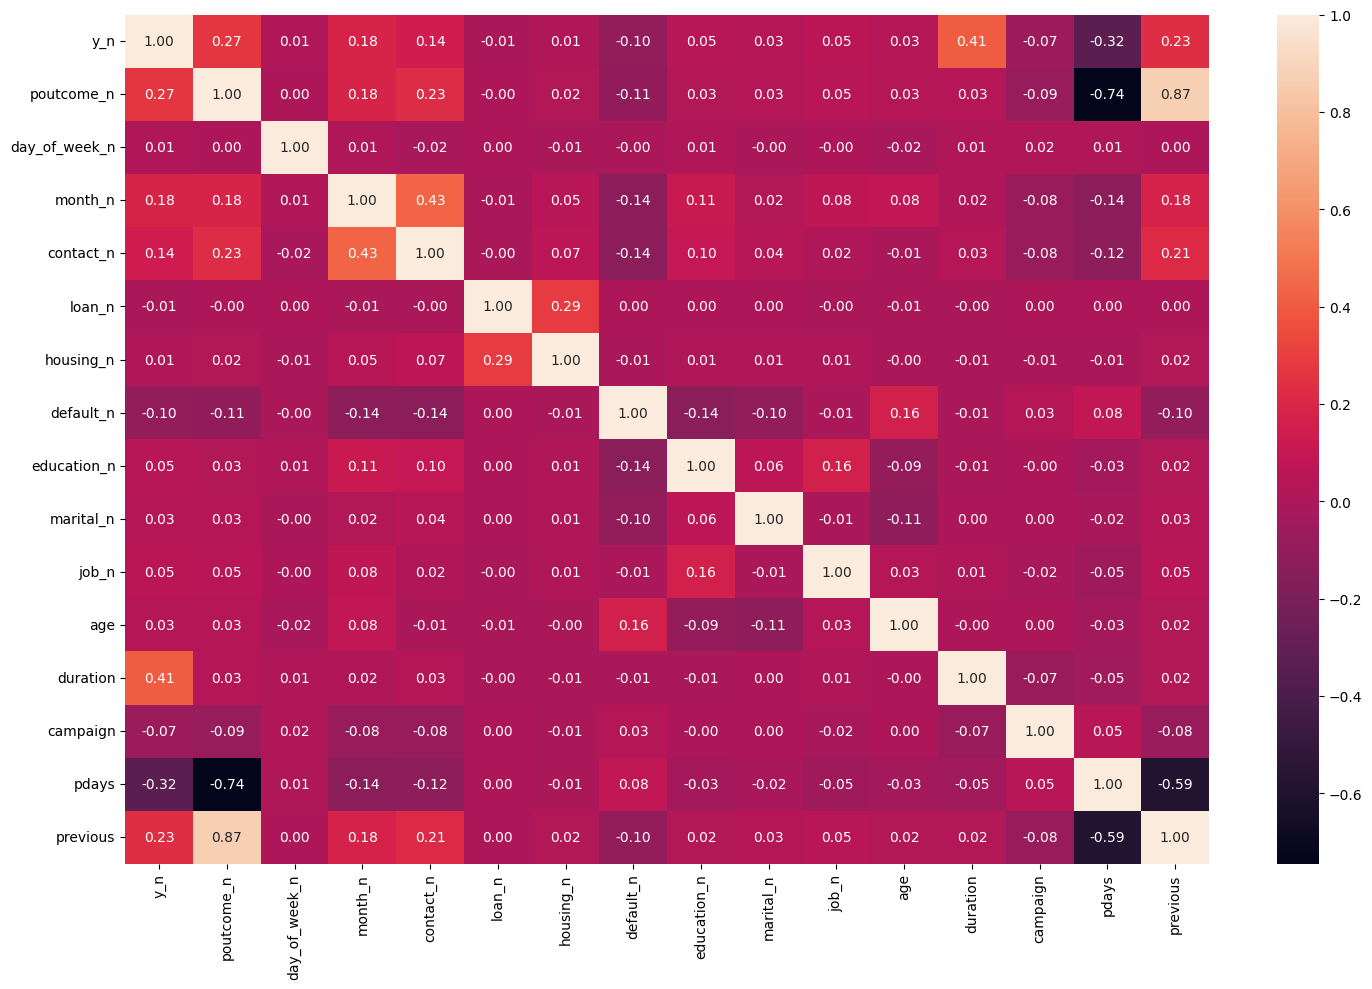

In [28]:
data["y_n"] = pd.factorize(data["y"])[0]
data["poutcome_n"] = pd.factorize(data["poutcome"])[0]
data["day_of_week_n"] = pd.factorize(data["day_of_week"])[0]
data["month_n"] = pd.factorize(data["month"])[0]
data["contact_n"] = pd.factorize(data["contact"])[0]
data["loan_n"] = pd.factorize(data["loan"])[0]
data["housing_n"] = pd.factorize(data["housing"])[0]
data["default_n"] = pd.factorize(data["default"])[0]
data["education_n"] = pd.factorize(data["education"])[0]
data["marital_n"] = pd.factorize(data["marital"])[0]
data["job_n"] = pd.factorize(data["job"])[0]

fig, axis = plt.subplots(figsize = (15, 10))

sns.heatmap(data[["y_n", "poutcome_n", "day_of_week_n", "month_n", "contact_n", "loan_n",
"housing_n", "default_n", "education_n", "marital_n", "job_n", "age", "duration", "campaign", "pdays", "previous"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

El análisis de correlaciones nos muestra una fuerte relación entre la duración del contrato anterior y la contratáción del crédito, así como una relación interesante con el número de contactos realizados durante la campaña anterior al cliente. A valorar, también es interesante el mes de comntacto y eltipo de comunicación que se hizo a través del celular. a Destacar también, la fuerte conexión entre el resultado de la campaña de marketing anterior y el número de contactos realizados durante la campaña anterior al cliente, lo que nos da una clave del resultado o la estrategia de marketing que debemos llevar a cabo.
Por otro lado, hay una relación negativa muy fuerte entre el número de días que transcurrieron desde la última campaña hasta que fue contactado, con el número de contactos realizados durante la campaña anterior al cliente y el resultado de la campaña de marketing anterior, lo que tiene cierta lógico puesto que son clientes a los que se les ha intentado influir demasiado.
Por último, veamos variables que no tienen interferencia absoluta con nada, por lo que nos plantearemos reducirlas del conjunto de datos (loan, housing, education, marital, job, age, day of the week)

***Ingeniería de características***

*Análisis de outliers*

In [29]:
data.describe()

,age,duration,campaign,pdays,previous,y_n,poutcome_n,day_of_week_n,month_n,contact_n,loan_n,housing_n,default_n,education_n,marital_n,job_n
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.112654,0.169904,1.979581,2.250097,0.634748,0.199767,0.571914,0.208872,3.277532,0.510634,3.673691
std,10.42125,259.279249,2.770014,186.910907,0.494901,0.316173,0.455754,1.411514,2.429079,0.481507,0.456002,0.541209,0.406686,2.185525,0.696779,2.454116
min,17.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,3.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,0.000000,0.000000,3.000000,3.000000,1.000000,0.000000,1.000000,0.000000,6.000000,1.000000,4.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.000000,2.000000,4.000000,9.000000,1.000000,2.000000,2.000000,2.000000,7.000000,3.000000,11.000000


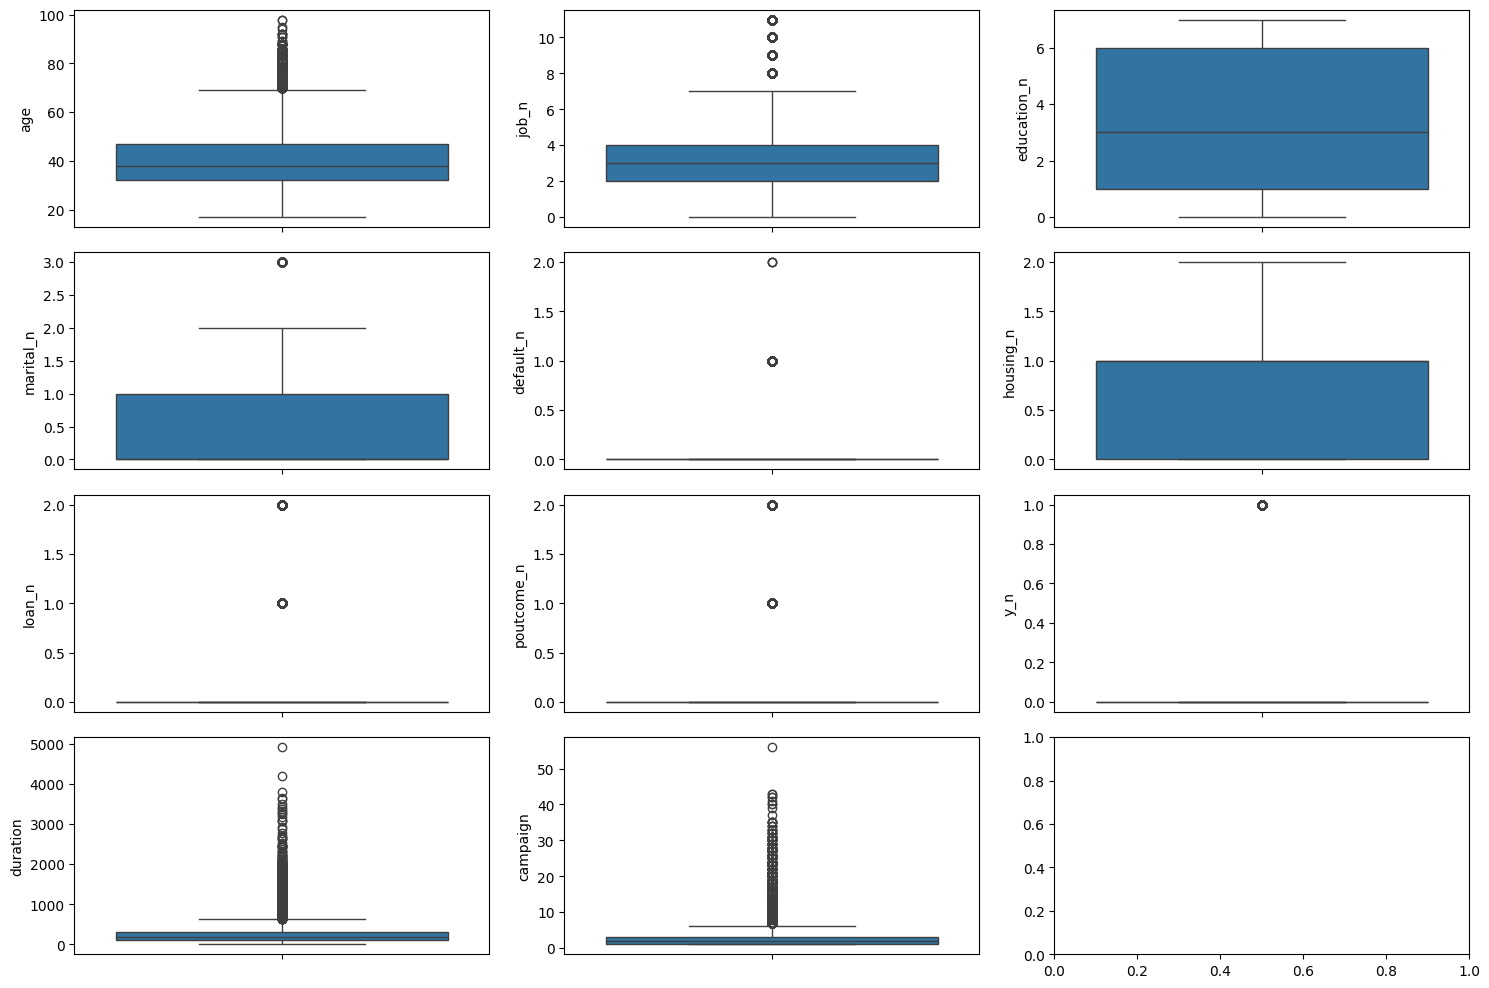

In [30]:
fig, axis = plt.subplots(4, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data, y = "age")
sns.boxplot(ax = axis[0, 1], data = data, y = "job_n")
sns.boxplot(ax = axis[0, 2], data = data, y = "education_n")
sns.boxplot(ax = axis[1, 0], data = data, y = "marital_n")
sns.boxplot(ax = axis[1, 1], data = data, y = "default_n")
sns.boxplot(ax = axis[1, 2], data = data, y = "housing_n")
sns.boxplot(ax = axis[2, 0], data = data, y = "loan_n")
sns.boxplot(ax = axis[2, 1], data = data, y = "poutcome_n")
sns.boxplot(ax = axis[2, 2], data = data, y = "y_n")
sns.boxplot(ax = axis[3, 0], data = data, y = "duration")
sns.boxplot(ax = axis[3, 1], data = data, y = "campaign")
plt.tight_layout()
plt.show()


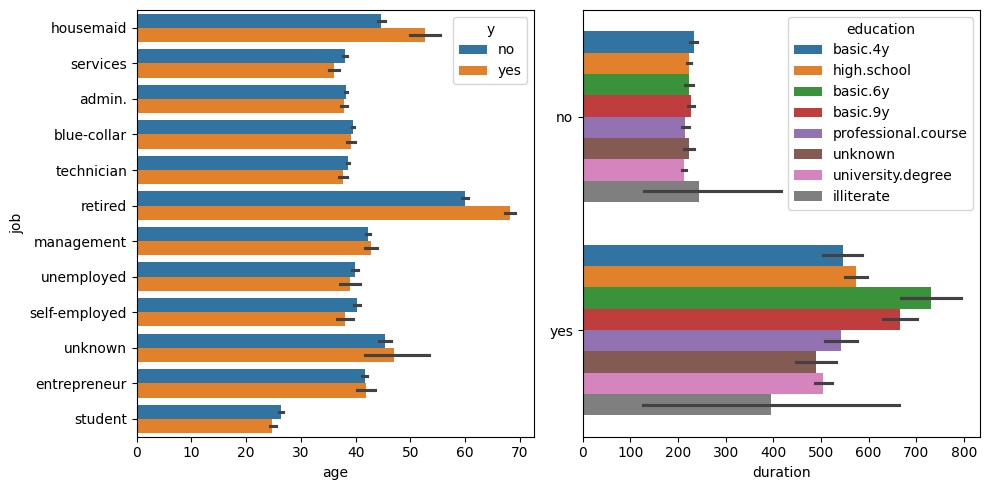

In [31]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)
sns.barplot(ax = axis[0], data = data, x = "age", y = "job", hue = "y")
sns.barplot(ax = axis[1], data = data, x = "duration", y = "y", hue = "education").set(ylabel = None)
plt.tight_layout()
plt.show()

***Escalado de valores***

In [32]:
from sklearn.preprocessing import StandardScaler

num_variables = ["poutcome_n", "day_of_week_n", "month_n", "contact_n", "loan_n",
"housing_n", "default_n", "education_n", "marital_n", "job_n", "age", "duration", "campaign", "pdays", "previous"]
scaler = StandardScaler()
norm_features = scaler.fit_transform(data[num_variables])
bank_ds_norm = pd.DataFrame(norm_features, index = data.index, columns = num_variables)
bank_ds_norm["y_n"] = data["y_n"]
bank_ds_norm.head()

,poutcome_n,day_of_week_n,month_n,contact_n,loan_n,housing_n,default_n,education_n,marital_n,job_n,age,duration,campaign,pdays,previous,y_n
0,-0.372802,-1.402469,-0.926328,-1.31827,-0.438089,-1.056746,-0.513600,-1.499673,-0.732858,-1.496969,1.533034,0.010471,-0.565922,0.195414,-0.349494,0
1,-0.372802,-1.402469,-0.926328,-1.31827,-0.438089,-1.056746,1.945327,-1.042111,-0.732858,-1.089485,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0
2,-0.372802,-1.402469,-0.926328,-1.31827,-0.438089,0.790990,-0.513600,-1.042111,-0.732858,-1.089485,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0
3,-0.372802,-1.402469,-0.926328,-1.31827,-0.438089,-1.056746,-0.513600,-0.584550,-0.732858,-0.682002,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0
4,-0.372802,-1.402469,-0.926328,-1.31827,1.754912,-1.056746,-0.513600,-1.042111,-0.732858,-1.089485,1.533034,0.187888,-0.565922,0.195414,-0.349494,0


***Selección de características***

In [33]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

# Dividimos el conjuno de datos en entrenamiento (train) y pruebas (test)
X = bank_ds_norm.drop("y_n", axis = 1)
y = bank_ds_norm["y_n"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Con un valor de k = 6 queremos decir implícitamente que queremos eliminar características del conjunto de datos
selection_model = SelectKBest(f_regression, k = 6)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)

X_train = X_train_sel.drop("y_n", axis = 1)
y_train = X_train_sel["y_n"]
X_test = X_test_sel.drop("y_n", axis = 1)
y_test = X_test_sel["y_n"]

X_train_sel.head()

,poutcome_n,month_n,contact_n,duration,pdays,previous,y_n
0,-0.372802,-0.102961,-1.31827,-0.633630,0.195414,-0.349494,0
1,-0.372802,-0.926328,0.75857,-0.548778,0.195414,-0.349494,0
2,1.821392,-0.926328,0.75857,-0.946038,0.195414,1.671136,0
3,-0.372802,-0.102961,0.75857,-0.633630,0.195414,-0.349494,0
4,-0.372802,-0.926328,-1.31827,0.330593,0.195414,-0.349494,0


In [34]:
X_train_sel.to_csv("/workspaces/JLL_machine-learning-python-template/data/processed/bank_data_train.csv", index=False)
X_test_sel.to_csv("/workspaces/JLL_machine-learning-python-template/data/processed/bank_data_test.csv", index=False)

****MACHINE LEARNING***

*Modelo de Regresion Logistica*

In [38]:
from sklearn.linear_model import LogisticRegression
#crear el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

#predecir y ver el accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
print("El nivel de accuracy del train es:", accuracy_score(y_train, y_pred))

El nivel de accuracy del train es: 0.9041578148710167


In [39]:
y_pred_test = model.predict(X_test)
print("El nivel de accuracy del test es:", accuracy_score(y_test, y_pred_test))

El nivel de accuracy del test es: 0.9058023792182569


*Optimización*

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros a mano que queremos ajustar
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid